-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** In the simulation we have a network of crossroads with many cars moving randomly. There is a traffic signal at each crossroad.
The smartcab(white car) is not moving at all in the simulation. This is because agent.py is not configured to move the cab or 
agentstage is not updated. 
The agent is recieving positive and negative rewards.
If the smartcab does not take action when signal is red we get a positive reward(0.5-2)
If the smartcab does not take action when signal is green and there is no oncoming traffic then we get high negative reward(-4.0 to 5.5)

high negative reward when the cab is stationary can also mean we are slightly giving more importance to reliability rather than safety.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
1.In agent.py we have 
Learning flag:- It decides how the smartcab should work.If this boolean value is set true then agent.py will follow Q-learning in default the falg is set false. We also can adjust alpha and epsilon parametres to see how it affects learning.

enforce_deadline flag:- if this is set to true then it means the smartcab is expected to reach the destination in time. By deafult the flag is set to false.

we also have update_delay, display, log_metrics to help us test the smartcab in various ways(update_delay, display to decrease training time, log_metrics for analysis)

2.act() funtion is called since we need reward the action based on traffic laws and act() function defines what reward to award the smartcab based on violations.

3.The conditional statements(which check violations) both in render() and render_text() are similar so this can mean they are performing same task but we have different implementation in render() which uses pygame module to display the GUI  and render_text() displays rewards directly in command_prompt.

4.In planner.py we first check for destination avalability then we check East-West first then North-South.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


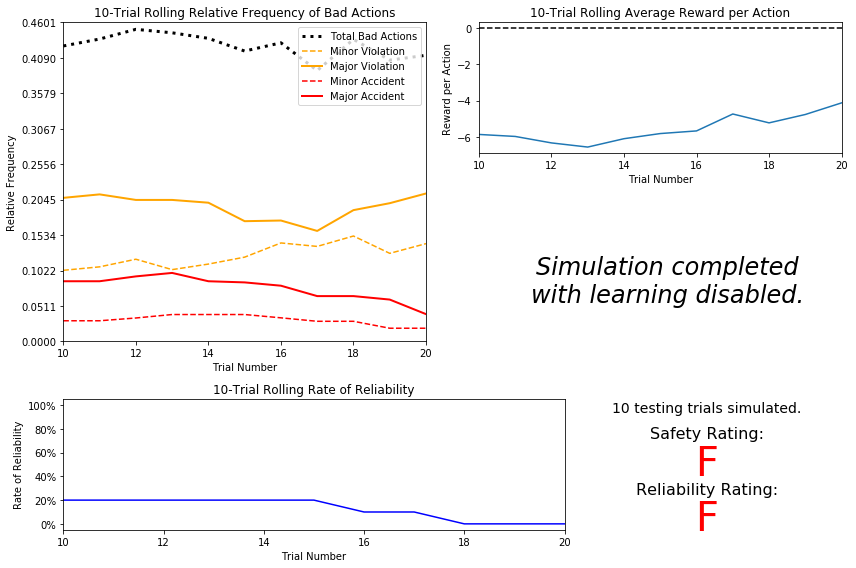

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
1.The driving agent takes bad actions 41%-46% times and around 13% turn out to be accidents(major+minor).

2.Yes, rate of realibility means reaching in time, since the driving agent is moving randomly the rate of realibity may always vary but the probability that it will reach the destination in time cannot exceed a low percent. So this means the smartcab if driven randomly has less realiability.

3.On an average the rewards recieved by the driving agent is negative. Bad decisions recieve negative rewards, given average reward negative means number bad decisions outweigh good decisions. This means there is heavy penalization. Though the reward is less negative as trail number increases, since the actions are random it will be difficult to say if reward wil be less negative overtime. But it is safe to say the average reward is negative most of the times.In environment 

For positive rewards we have violation =0 and some math to calculate poistive reward here we are adding atmost 1-2 to reward

For negative rewards we have

 if violation == 1: # Minor violation
 
   reward += -5
   
elif violation == 2: # Major violation

   reward += -10
   
elif violation == 3: # Minor accident

   reward += -20
   
elif violation == 4: # Major accident

   reward += -40

This clearly shows penalization is heavy for accidents


4.In my case of 10 trails we can see that the bad actions go up and down between 0.4 to 0.46. Traffic violations are slightly increasing but accidents are slightly decreasing. The rate of reliability also appears to be decreasing. Honestly,i think there will be no pattern even if we increase the test trails above 10.There is no way to predict how a random car will move hence no way to tell how bad decision vary wil number of trails. As of reliability the car wont reach the destination on time in most of the cases.

5.As we can see the grading the Smartcab is neither safe nor reliable. rate of reliability is less than 20% and accidents happen 40% of the times.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
1.Safety 

Light:- the color of the light plays an important role in deciding the action to be taken and how the driving agent is rewarded in each step. Bad actions taken not only means negative rewards but also possibility of accidents therefore an important feature to consider for safety.

As for 3 way vehicle features(left, right and oncoming vehicles) i would say all three vehicle inputs are important. If we examine the act() function in envirionment.py, we reward based on action which is possible in 3 ways

If Smartcab intends to move forward first the signal has to be green. then there shouldnt be any vehicle with forward state in 'left' and 'right' sides( if inputs['left'] == forward or inputs['right'] == forward then violation)

If Smartcab intends to move right we need to check for single condition.If light not green and 'left'==forward if so  then violation

Finally little bit complicated case if Smartcab intends to move left but In the environment.py we can see that we consider 3 features 'oncoming' , 'left' , 'right' in this section to check for accident.

Therefore i will say that all 3 features are important for safety.

2.Efficency

Waypoint tells us which direction to move or the action decider which gives efficent direction in each step therefore an important factor in reliability. Since the waypoint decides action, i feel that we need not consider possible actions as seperate feature.

The feature not appropiate to consider is 'deadline'. On first thought it may seem that knowing deadline will help Smartcab to know time remaining to reach destination but we use Q-Learning. This means after training we have a matrix which has reward for each action taken. Furthermore even if Smartcab knows the deadline it is useless as it cannot reach the destination faster(i mean driving faster:)). The waypoint also leads the cab to the destination so i feel that knowing deadline is redundant.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Features considered and states of each feature

inputs[light]=('red','green')

inputs[left]=('left','right','forward','none')

inputs[right]=('left','right','forward','none')

inputs[oncoming]=('left','right','forward','none')

waypoint=('left','right','forward')

Total states = 2x4x4x4x3 = 384 states

For example each state will be like {'red','left','left','left','left'} with each combination.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

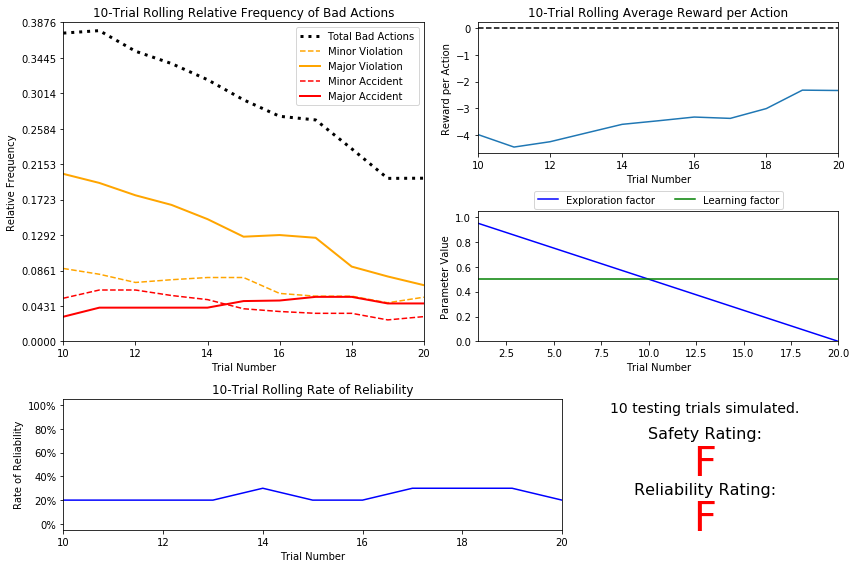

In [7]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
1.The safety rating is the same because the total frequency of accidents are nearer to basic driving agent (although little less value). There is 9% chance of accidents.The reliability rating definetely increased since the path the smartcab takes is no longer random. The realibility slightly increased because of that.Another important thing to observe is the frequency of bad actions decreases as traild increases ans even the initial value is lesser than basic driving agent(37%)

2.20 training trails were performed as per the logs. i believe this has a relationship with epsilon. the decay function is linear and decreases by 0.05 in each trail. the initial value of epsilon is 1(default). Training happens till epsilon reaches 0.That is 1-X*0.05=0 or X=20 hence 20 trails.

3.In parmeter panel i could see epsilon value decreasing by a constant value of 0.05 in each training trail.

4.We can see in th graph as the training trails increased the bad actions decrease.Also the average rewards per action is also increasing as the number of trails increase.

5.The safety and reliability rating appear to be the same but this does not mean both the models have same performance. The bad actions, violations and accidents definitely are decreasing. realibility and average reewards are also increasing with increasing trails.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

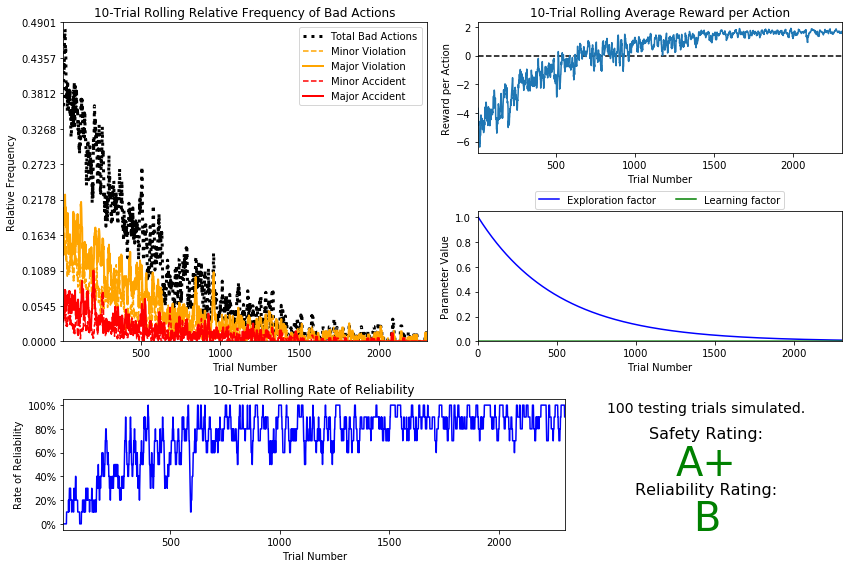

epsilon = e**(-alpha*t), alpha=0.02, tolerance=0.01


In [13]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')                 
print("epsilon = e**(-alpha*t), alpha=0.02, tolerance=0.01") #we want small alpha value to allow sufficient training trails

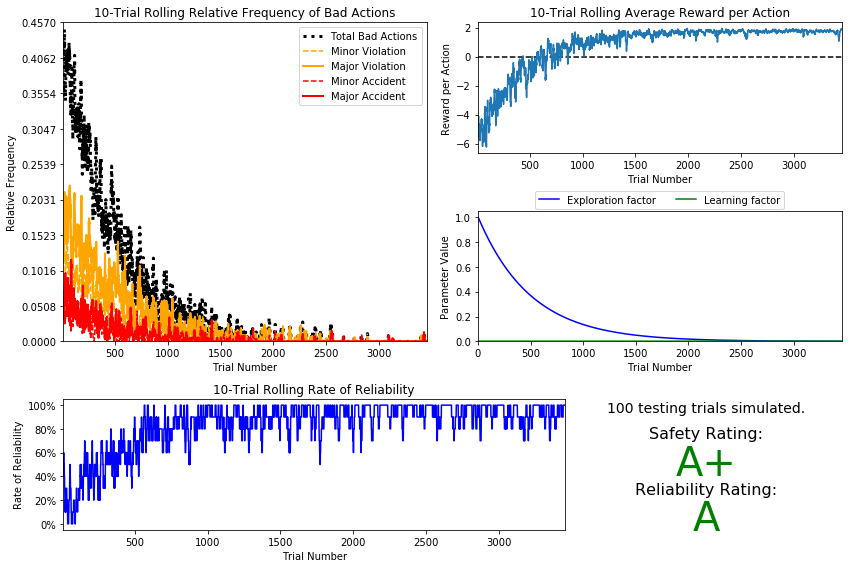

In [2]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')                 

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
1.The decay function used was self.epsilon = math.exp(-self.alpha*self.t) i felt that e^a was very simple and t/t**2 will have same training trails because it does not depend on alpha. so i felt to it would be better to use the latter two decay functions.

2.approximately 3500 for e^(-a*t) as we can see from the graph

3.alpha value needed to be less 0.002 so that there are more number of training trails and q-learning matrix is replaced with rewards which give maximum safet rating.

4.the safety went to a+ and realibility went to a for e=e^(-a*t) there is a significant improvement.

5.i feel that the q-learner for e=e^(a*t) learnt the policy around 1500 trails as we can see the safety rating is a+

6.the present model is working better than previous ones safety is atmost importance as told in the introductory video so i think safety has been achieved.
the realibility improved beacuse of the learning rate each state space space was visited several times to achieve correct rewards for q learning matrix

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
1.From the video official traffic rules and state spaces defined an optimal policy would be
Red light
States
#waypoint #light#vehicle_left#vehicle_right #vehicle_oncoming

right,red,none,none,none   action = right is optimal policy

right,red,forward,none,none action = none is optimal policy

any other action takes in these cases is incorrect policy as it results in violation as per environment code

any other way point forward, left the vehicle taking no action in red signal is optimal policy, if action taken it is incorrect policy


Green light
States
#waypoint #light#vehicle_left#vehicle_right #vehicle_oncoming
right,green,none,none,none if action = none means the vehicle is not moving in green signal it is not optimal policy of action 
is right it is optimal policy

Similarly

if waypoint is right and signal is green optimal policy.if signal is red and inputs[left]=forward no action should be taken.

if waypoint is left and signal is green go left. if signal is red no action should be taken

if waypoint is forward and signal is green then check for oncoming traffic from 'left' and 'right'

to succusefully move without violations and accidents and moving closer to destination is an optimal policy

an example of suboptimal policy would be Smartcab staying stationary when the signal is green and there is no oncoming traffic.

an incorrect policy will lead to violations and accidents


2.
an example from txt
('right', 'red', None, 'left', 'left')  #waypoint #light#vehicle_left#vehicle_right #vehicle_oncoming
 -- forward : -0.18
 -- right : 0.35
 -- None : 0.00
 -- left : -0.11
 
 as we can see traffic is clear for vehicle left going right is optimal policy.
 
 3.
('forward', 'green', 'left', 'left', 'forward') #waypoint #light#vehicle_left#vehicle_right #vehicle_oncoming
 -- forward : 0.10
 -- right : 0.00
 -- None : -0.02
 -- left : -0.04
 signal is green and taking no action will give neative rewards moving towards waypoint is optimal policy
 
 we can see the weight of forward is maximum an it is the correct decision since we have a red light and we want to go left. the values are derived from the Q-matrix after it is optimised by training. there is a q value for each and every state and it will decide optimal decisions. This methid is called reinforcement learning because the value in Qmatrix is updated with each training trail.
 
 4.('right', 'red', 'right', 'forward', None) #waypoint #light#vehicle_left#vehicle_right #vehicle_oncoming
 -- forward : -0.16
 -- right : 0.06
 -- None : 0.00
 -- left : 0.00
there is oncoming traffic from right and still reward is given for action = right where optimal policy is taking no action.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
Smartcab agent can only make decisions based on states derived from a generic intersection in a grid world with no precievable location information. Currently the environment does not expose this (X,Y) coordinate location information to the Smartcab agent. Thus, location information cannot be expressed in the Q-Learning agent's state table for it to bias its action against in the grid world. In other words, the Smartcab has no knowledge of its (X,Y) location in the grid world, so cannot be bias to move away from that to another (X,Y) location that it also does not know about. It can only go towards its destination based on directions given by its environment alone at its current state.

the destination goals are randomly selected after each training or testing session. This means that the agent, besides requiring current location (X,Y) coordinates, would also need to learn a constantly changing goal. This combination does not yield a good way to calculate a future reward that will lead to good driving decisions for the agent, since a future reward would be a location/destination based policy and not a traffic rule based policy. So, this means updating the Q-value calculation at time t by including future rewards will, in fact, make the Smartcab agent start learning bad actions since the negative rewards generated by the bad actions are much smaller than the accumulated future rewards of meeting the goal. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.